## Abstract
The TMNIST Alphabet dataset is a large-scale collection of 274,093 grayscale images, each formatted as 28x28 pixels. It encompasses 127 unique character classes, including letters, symbols, and characters from multiple scripts, providing a diverse and challenging benchmark for character recognition. The dataset is presented in CSV format, with each row containing font names, character labels, and pixel values that compose the image.

For this analysis, the data was split into two subsets: 219,274 images for training and 54,819 images for validation. Preprocessing steps included normalization of pixel values to a range of 0 to 1, reshaping the images for compatibility with a Convolutional Neural Network (CNN), and encoding the labels into a multi-class format. The CNN model employed in this study consisted of seven layers, designed to extract features and classify characters with precision.



## **Objective**
The primary objective of this project is to design and evaluate a Convolutional Neural Network (CNN) for character recognition using the TMNIST Alphabet dataset. The task involves:

1. **Preprocessing** the data by normalizing pixel values, reshaping images, and encoding labels.
2. **Building and training** a CNN model to identify and classify 127 distinct characters.
3. **Evaluating model performance** based on validation accuracy to determine its efficacy in multi-class classification tasks.

This study aims to explore the effectiveness of a relatively simple CNN architecture in handling a diverse dataset. The results contribute to the broader goal of improving character recognition systems for practical applications in automated systems and machine learning research.

### Step 1: Import Libraries
Import necessary libraries for data handling, visualization, and building a Convolutional Neural Network (CNN).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Step 2: Load and Explore Dataset
Load the TMNIST dataset containing pixel values for 28x28 grayscale character images. Display the dataset's structure and dimensions for initial analysis.

In [3]:
# Load the dataset
data = pd.read_csv("94_character_TMNIST.csv")

# Explore the dataset
print(data.head())
print(f"Dataset Shape: {data.shape}")


                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]
Dataset Shape: (274093, 786)


### Step 3: Visualize Sample Images
Randomly sample 25 images from the dataset, reshape them to 28x28 pixels, and display them with their labels. This gives an initial visual understanding of the data.

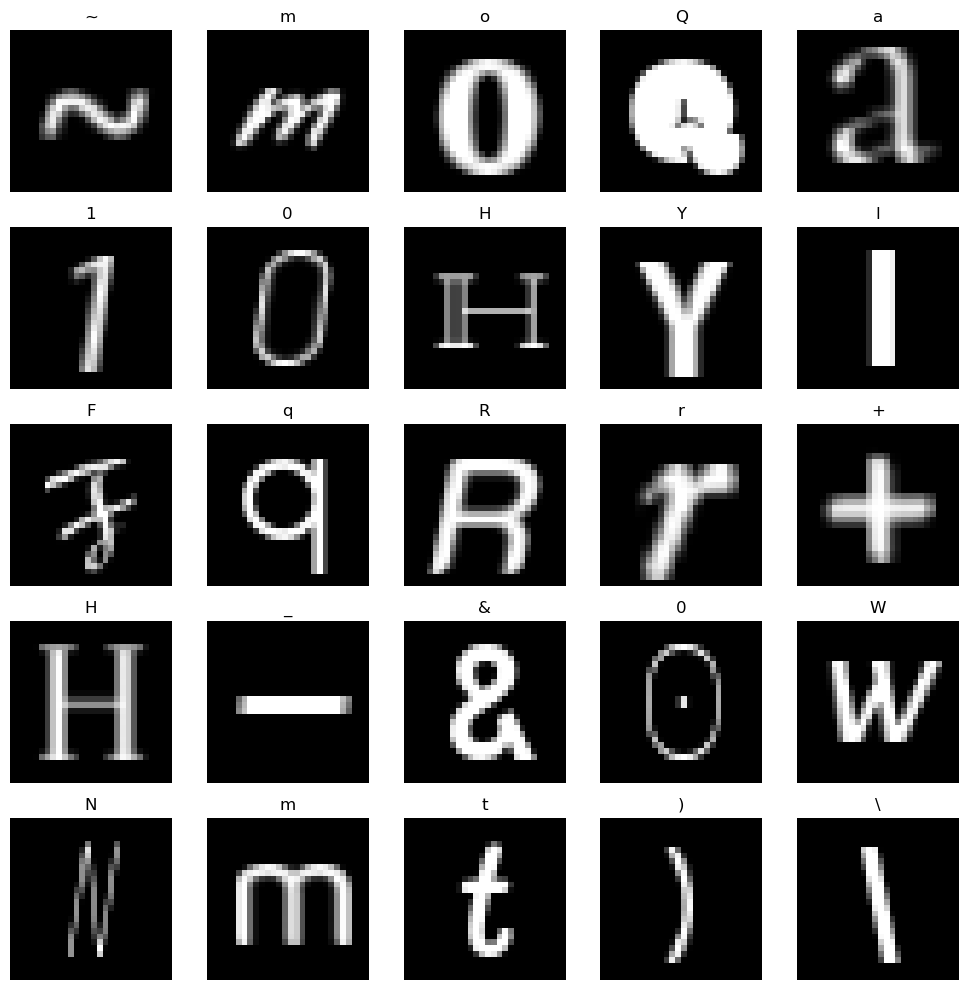

In [5]:
# Sample Visualization
samples = data.sample(25)  # Randomly sample 25 rows
pixel_data = samples.iloc[:, 2:].values  # Exclude 'names' and 'labels'
images = pixel_data.reshape(-1, 28, 28)  # Reshape into 28x28 images
labels = samples["labels"].values  # Extract labels

# Normalize pixel values
images = images / 255.0

# Visualize the samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])  # Display the label
    plt.axis('off')
plt.tight_layout()
plt.show()


### Step 4: Preprocess Data
- Prepare feature matrix (`X`) and labels (`y`).
- Normalize pixel values to range [0, 1].
- Reshape images for compatibility with CNNs.
- One-hot encode labels for multi-class classification.


**Input Data Representation**
- The input consists of 28x28 grayscale images represented as matrices of pixel intensity values in the range [0, 255].
- Pixel values are normalized to the range [0, 1]:
  $$ X_{\text{normalized}} = \frac{X}{255.0} $$
- Each image is reshaped to include a single-channel dimension:
  $$ X_{\text{reshaped}} \in \mathbb{R}^{N \times 28 \times 28 \times 1} $$
  where \( N \) is the number of samples.


In [6]:
# Exclude 'names' column and split features and labels
X = data.iloc[:, 2:].values  # Pixel values
y = data["labels"].apply(lambda x: ord(x) if isinstance(x, str) else x).values  # Convert labels to numeric (ASCII)

# Check for the range of labels
print(f"Max label: {y.max()}, Min label: {y.min()}")

# Dynamically set the number of classes
num_classes = y.max() + 1
print(f"Number of classes: {num_classes}")

# Normalize the pixel values
X = X / 255.0  # Normalize pixel values to [0, 1]

# Reshape images to add channel dimension for CNN
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=num_classes)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")


Max label: 126, Min label: 33
Number of classes: 127
Training data shape: (219274, 28, 28, 1), (219274, 127)
Validation data shape: (54819, 28, 28, 1), (54819, 127)


### Step 5: Build the CNN Model
Define a Convolutional Neural Network with:
- Two convolutional layers for feature extraction.
- MaxPooling layers for dimensionality reduction.
- Dropout layers for regularization.
- Dense layers for final classification.
The number of output neurons dynamically adjusts based on the number of classes.



**Convolutional Layers**
- The convolution operation applies a filter (kernel) to extract spatial features like edges and textures.

**Mathematics of Convolution Operation**
- For a filter \( W \) and input patch \( X \):
  $$ z = \sum_{i=1}^{k} \sum_{j=1}^{k} W_{i,j} \cdot X_{i,j} + b $$
  where:
  - \( W \): Weights of the filter.
  - \( k \): Filter size (e.g., 3x3).
  - \( X \): Input image patch.
  - \( b \): Bias term.
  - \( z \): Result of the convolution operation.

**Activation Function (ReLU)**
- After convolution, the ReLU activation function is applied:
  $$ f(x) = \max(0, x) $$
  This introduces non-linearity, enabling the network to learn complex patterns.



- Pooling reduces spatial dimensions while retaining essential features.

**Mathematics of Max Pooling**
- For a pooling region \( R \):
  $$ z = \max(R) $$
  where \( R \) is a subset of the input matrix.

- For example, applying a 2x2 pooling with stride 2 reduces a \( 4 \times 4 \) matrix to \( 2 \times 2 \).



**Output Layer (Softmax Activation)**
- The output layer has neurons equal to the number of classes (\( 94 \)), and the softmax function converts logits into probabilities:
  $$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}} $$
  where:
  - \( z_i \): Logit for class \( i \).
  - \( C \): Total number of classes (\( C = 94 \)).

In [7]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

### Step 6: Compile the Model
Compile the CNN using:
- **Adam Optimizer**: Adaptive learning for faster convergence.
- **Categorical Crossentropy Loss**: Suitable for multi-class classification.
- **Accuracy Metric**: To track performance during training.


#### Optimization (Adam Optimizer)
- The Adam optimizer updates the weights and biases during backpropagation using:
  $$ m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla \text{Loss} $$
  $$ v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla \text{Loss})^2 $$
  $$ W = W - \frac{\alpha}{\sqrt{v_t} + \epsilon} m_t $$
  where:
  - \( m_t \): Exponentially weighted average of gradients.
  - \( v_t \): Exponentially weighted average of squared gradients.
  - \( \alpha \): Learning rate.
  - \( \epsilon \): Small value to prevent division by zero.

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Step 7: Train the Model
Train the model on the training dataset with a validation split of 20%. The training runs for 10 epochs with a batch size of 128.


In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
1714/1714 [==============================] - 36s 21ms/step - loss: 1.0274 - accuracy: 0.7168 - val_loss: 0.3980 - val_accuracy: 0.8708
Epoch 2/10
1714/1714 [==============================] - 35s 20ms/step - loss: 0.5413 - accuracy: 0.8338 - val_loss: 0.3394 - val_accuracy: 0.8931
Epoch 3/10
1714/1714 [==============================] - 35s 20ms/step - loss: 0.4608 - accuracy: 0.8596 - val_loss: 0.2984 - val_accuracy: 0.9063
Epoch 4/10
1714/1714 [==============================] - 36s 21ms/step - loss: 0.4171 - accuracy: 0.8737 - val_loss: 0.2633 - val_accuracy: 0.9186
Epoch 5/10
1714/1714 [==============================] - 36s 21ms/step - loss: 0.3870 - accuracy: 0.8822 - val_loss: 0.2512 - val_accuracy: 0.9242
Epoch 6/10
1714/1714 [==============================] - 35s 21ms/step - loss: 0.3660 - accuracy: 0.8880 - val_loss: 0.2375 - val_accuracy: 0.9266
Epoch 7/10
1714/1714 [==============================] - 35s 20ms/step - loss: 0.3503 - accuracy: 0.8926 - val_loss: 0.2318 -

### Step 8: Evaluate the Model
Evaluate the model's accuracy and loss on the validation dataset to measure its performance.


- Accuracy measures the proportion of correctly classified samples:
  $$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}} $$


In [10]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 93.15%


### Step 9: Visualize Training Performance
Plot the training and validation accuracy and loss over epochs to assess model performance trends.

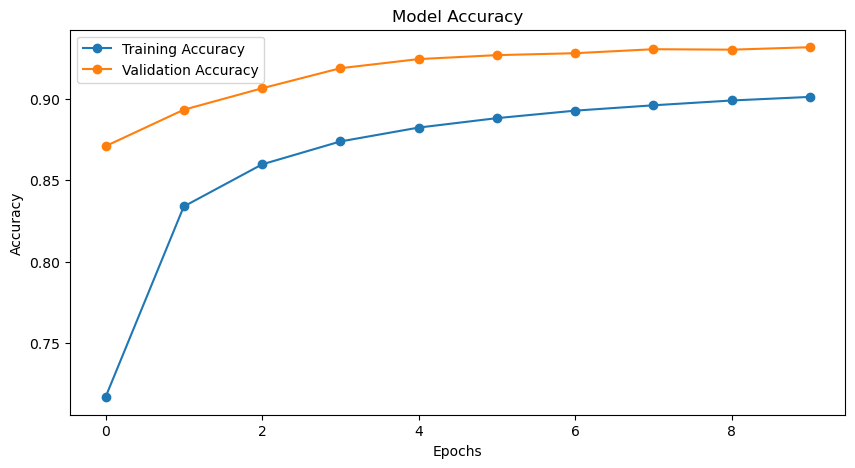

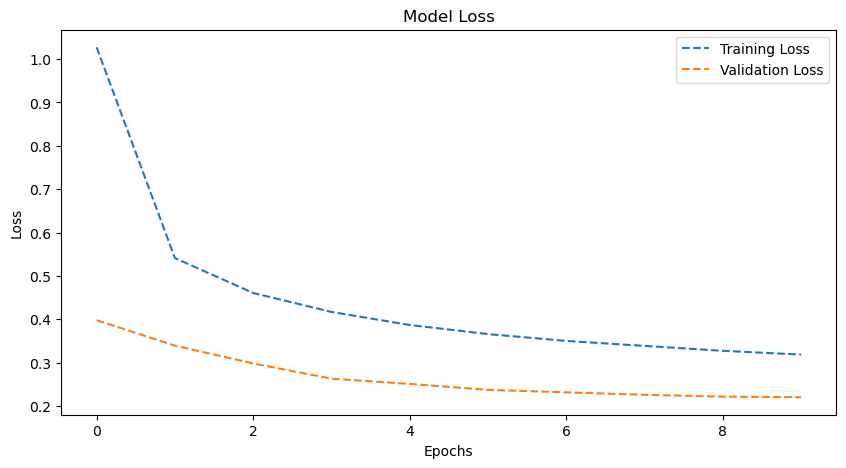

In [11]:
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### **The model gives an accuracy of 93.10%**

## **Result**
The model achieved a validation accuracy of 93.10%, demonstrating the potential of lightweight neural network architectures for diverse character recognition tasks. This work underscores the value of the TMNIST dataset as a tool for advancing research in machine learning, image recognition, and related applications such as automated text recognition and document digitization.

### Summary
- The CNN architecture leverages convolutional layers for feature extraction, pooling layers for dimensionality reduction, and dense layers for classification.
- The loss function (categorical crossentropy) and optimizer (Adam) ensure efficient training and convergence.
- Metrics like accuracy provide insights into the model's performance on unseen data.
